# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

In [12]:

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from  math import cos, pi
import seaborn as sns
import pandas as pd         
import datetime as dt
from pandas_datareader import data
%matplotlib inline



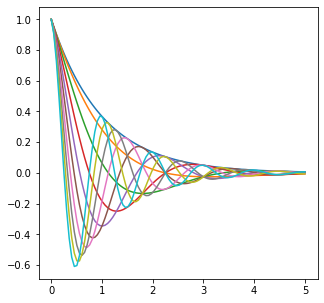

In [5]:
def doplot():
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    t = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    x = np.linspace(0, 5, 100)
    for theta in np.linspace(0,2,10):
        ax.plot(x, np.cos(pi * x * theta) * np.exp(-x))
    plt.show()
    return ax

doplot()

# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

Text(0, 0.5, 'Double fault ratio')

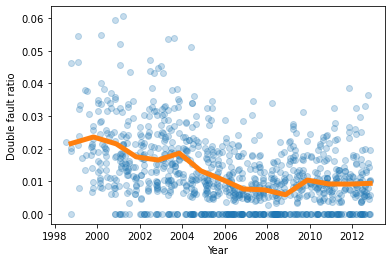

In [6]:

df = pd.read_csv('data/tennis.csv')
df['ratio'] =  df['player1 double faults'] / df['player1 total points total']

#sns.scatterplot(pd.to_datetime(df['start date']),df['ratio'],alpha=0.25,lw=0)

fig,ax=plt.subplots(1,1)

ax.plot_date(pd.to_datetime(df['start date']),df['ratio'],alpha=0.25,lw=0)
ax.plot(pd.to_datetime(df.groupby('year')['start date'].max()), df.groupby('year')['ratio'].mean(), '-', lw = 5)

plt.xlabel('Year')
plt.ylabel('Double fault ratio')

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


In [9]:

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}


In [13]:
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

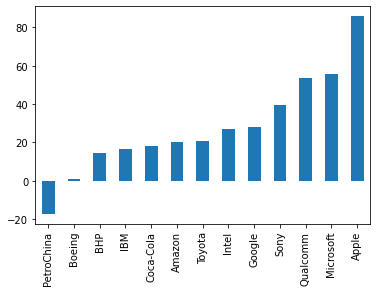

In [14]:

#ticker.reset_index (inplace=True)
ticker.head(2)

#get header list
x = list(ticker_list.values())
ticker.columns =  x

((ticker.iloc[-1] - ticker.iloc[0]) / ticker.iloc[0] * 100).sort_values().plot(kind='bar')

#groupby year .first or .last

# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

In [23]:

indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

In [24]:
def read_data(indices_list,
          start=dt.datetime(1970, 1, 2),
          end=dt.datetime(2020, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in indices_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker



In [25]:
ticker = read_data(indices_list)

In [26]:
ticker = ticker.groupby(ticker.index.year).mean()


In [27]:
ticker = ticker.pct_change()

Text(0, 0.5, 'Percent Change')

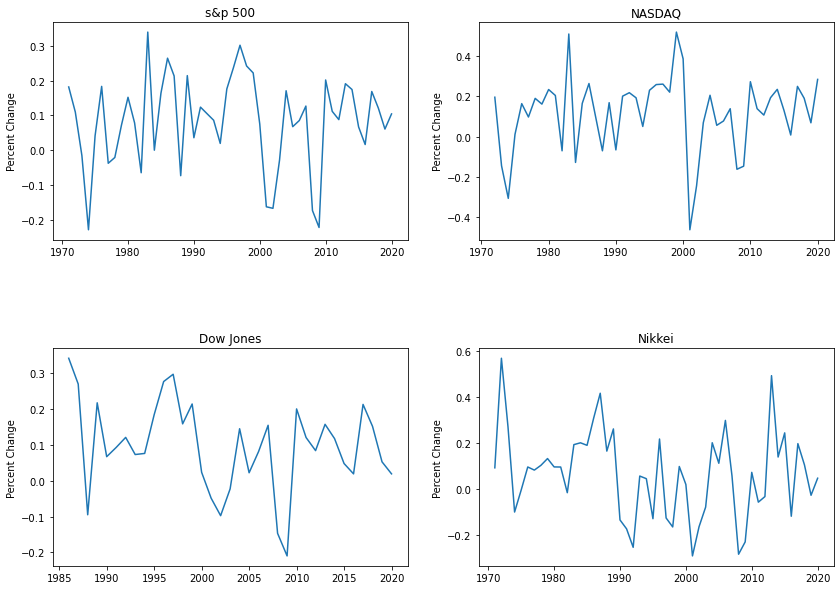

In [28]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

plt.subplots_adjust(wspace=0.2, hspace=0.5)

axes[0, 0].plot(ticker['^GSPC'])
axes[0, 0].set_title('s&p 500')
axes[0, 0].set_ylabel('Percent Change')

axes[0, 1].plot(ticker['^IXIC'])
axes[0, 1].set_title('NASDAQ')
axes[0, 1].set_ylabel('Percent Change')

axes[1, 0].plot(ticker['^DJI'])
axes[1, 0].set_title('Dow Jones')
axes[1, 0].set_ylabel('Percent Change')

axes[1, 1].plot(ticker['^N225'])
axes[1, 1].set_title('Nikkei')
axes[1, 1].set_ylabel('Percent Change')

# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

In [29]:

df = pd.read_csv('data/tennis.csv')
df['ratio'] = df['player1 double faults'] / df['player1 total points total']
df

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win,ratio
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False,0.019417
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True,0.000000
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True,0.020270
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0,False,0.046154
4,1998,"Geneva, Switzerland",1998-08-24,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",S,...,16.0,21.0,95.0,141.0,51.0,135.0,146.0,276.0,False,0.018116
1175,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R32,...,0.0,8.0,22.0,45.0,9.0,41.0,31.0,86.0,True,0.000000
1176,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R16,...,2.0,9.0,28.0,50.0,11.0,49.0,39.0,99.0,True,0.000000
1177,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",Q,...,9.0,16.0,47.0,78.0,34.0,95.0,81.0,173.0,True,0.011561


In [30]:

surface_list=[]
surface_list = df.surface.unique()

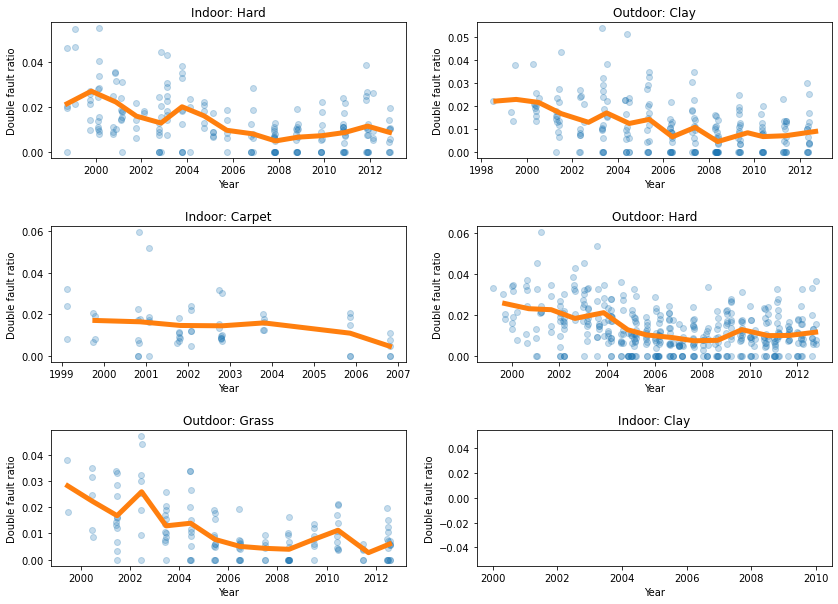

In [31]:

s = 0
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,10))

plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i in range(3):
    for j in range(2):
        dff = df.loc[df.surface == surface_list[s]]
        axes[i,j].plot_date(pd.to_datetime(dff['start date']),dff['ratio'],alpha=0.25,lw=0)
        axes[i, j].plot(pd.to_datetime(dff.groupby('year')['start date'].max()), dff.groupby('year')['ratio'].mean(), '-', lw = 5)
        axes[i, j].set_title(surface_list[s])
        axes[i, j].set_ylabel('Double fault ratio')
        axes[i, j].set_xlabel('Year')
        
        s += 1